<a href="https://colab.research.google.com/github/YM53858/DATA-690-WANG/blob/master/Assignment_08/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 8
For this assignment , we will use the college scorecard dataset. 
<pre>
From the 22 individual school year data files, randomly (using Python) select one file. 
Only read the column "TUITIONFEE_IN" frm this file into a data frame.
Find out how many observations this data frame has.
Find out how many observations that have missing value. Drop those observations.
Find out how many observations that have value of zero. Drop those observations.
Calculate the mean of the tuition.
Randomly select one observation, find out the tuition of that observation.
Calculate the different between the tuition of this observation and the average tuition (mean) off all observations above.
Randomly select another observation and repeat the above.
Randomly select another observation and repeat the above.
Randomly select 5 observations, display the tuition of these observation.
Calculate the average of these 5 observations
Calculate the different between the average tuition of thes 5 observations and the average tuition (mean) off all observations above.
Randomly select another 5 observations and repeat the above.
Randomly select another 5 observation and repeat the above.

Randomly select 10 observations, display the tuition of these observation.
Calculate the average of these 10 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 10 observations and repeat the above.
Randomly select another 10 observation and repeat the above.


Randomly select 20 observations, display the tuition of these observation.
Calculate the average of these 20 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 20 observations and repeat the above.
Randomly select another 20 observation and repeat the above.

Randomly select 30 observations, display the tuition of these observation.
Calculate the average of these 30 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 30 observations and repeat the above.
Randomly select another 30 observation and repeat the above.

Write a function that take an input x (number of observations). 
The function will perform the following:

Randomly select x observations, display the tuition of these observations.
Calculate the average of these x observations
Calculate the different between the average tuition of these x observations and the average tuition (mean) off all observations above.
Display the difference.
<pre>


In [ ]:
# 1 - Import necessary libraries

import pandas as pd
import numpy as np
import os
import re
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # To avoid warnings

In [ ]:
path = os.getcwd()
path

'C:\\Users\\saivi\\Desktop\\690 STATS&VIZ\\Assignment 8'

In [ ]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

clist = os.listdir("CollegeScorecard_Raw_Data/")
clist[:] = [x for x in clist if x.startswith("MERGED")==True]
clist

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2018_19_PP.csv']

In [ ]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

file_name = random.choice(clist)
file_name

'MERGED2011_12_PP.csv'

In [ ]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

df = pd.read_csv("CollegeScorecard_Raw_Data/"+file_name, usecols=['INSTNM','TUITIONFEE_IN']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7746 entries, 0 to 7745
Data columns (total 2 columns):
INSTNM           7746 non-null object
TUITIONFEE_IN    4444 non-null float64
dtypes: float64(1), object(1)
memory usage: 121.2+ KB


In [ ]:
# 5 - Find out how many observations have missing value.
df.isna().sum()

INSTNM              0
TUITIONFEE_IN    3302
dtype: int64

In [ ]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4444 entries, 0 to 7741
Data columns (total 2 columns):
INSTNM           4444 non-null object
TUITIONFEE_IN    4444 non-null float64
dtypes: float64(1), object(1)
memory usage: 104.2+ KB


In [ ]:
# 7 - Find out how many observations have 0 tution. 
df.astype(bool).sum(axis=0)

INSTNM           4444
TUITIONFEE_IN    4439
dtype: int64

TUITIONFEE_IN column has zero values

In [ ]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df['TUITIONFEE_IN'] = df['TUITIONFEE_IN'].replace(0, np.nan)
df = df.dropna()
df.astype(bool).sum(axis=0)

INSTNM           4439
TUITIONFEE_IN    4439
dtype: int64

Dropped the rows with zero value successfully.

In [ ]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 

t_mean = df['TUITIONFEE_IN'].mean()
print("The mean or average of the tuitions of all the remaining observations is ", df['TUITIONFEE_IN'].mean())

The mean or average of the tuitions of all the remaining observations is  13076.547420590223


In [ ]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 

r_df = df.sample(n=1)
r_df

,INSTNM,TUITIONFEE_IN
2674,Nyack College,21500.0


In [ ]:
t_sr = r_df['TUITIONFEE_IN'].values[0]
r_df['TUITIONFEE_IN']

2674    21500.0
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

diff_sr = abs(t_mean - t_sr ) # difference between mean and randon observation tuition_fee
diff_sr

8423.452579409777

In [ ]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

for i in range(1,11): # Repeating 10 times
    r_df = df.sample()
    t = r_df['TUITIONFEE_IN'].values[0]
    print(r_df['TUITIONFEE_IN'])
    print("The different between the tuition of this observation and the mean tuition is ",abs(t_mean - t ))
    print('------------------------------------')

1990    28500.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  15423.452579409777
------------------------------------
2901    2186.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  10890.547420590223
------------------------------------
1116    13838.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  761.4525794097772
------------------------------------
3015    5550.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  7526.547420590223
------------------------------------
5748    2662.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  10414.547420590223
------------------------------------
1668    6347.0
Name: TUITIONFEE_IN, dtype: float64
The different betwe

In [ ]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 
r_df = df.sample(n=20)
r_df['TUITIONFEE_IN']

5560    10858.0
6620    15057.0
7384    13691.0
15       4080.0
4347    15605.0
153      7352.0
573     10805.0
7464    10620.0
1218    11038.0
2803    10800.0
3256     2907.0
3425    19620.0
5861    15188.0
3427    27680.0
2248     2410.0
392       948.0
2962    16347.0
1527     3240.0
2909     2204.0
3498    13102.0
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 14 - Calculate and display the mean tuition of these 20 observations
m = r_df['TUITIONFEE_IN'].mean()
m

10677.6

In [ ]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
abs(r_df['TUITIONFEE_IN']-m)

5560      180.4
6620     4379.4
7384     3013.4
15       6597.6
4347     4927.4
153      3325.6
573       127.4
7464       57.6
1218      360.4
2803      122.4
3256     7770.6
3425     8942.4
5861     4510.4
3427    17002.4
2248     8267.6
392      9729.6
2962     5669.4
1527     7437.6
2909     8473.6
3498     2424.4
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

for i in range(1,16): # Repeating 15 times
    print("OBSERVATION " + str(i) +" :")
    r_df = df.sample(n=20)
    m = r_df['TUITIONFEE_IN'].mean()
    print("mean is ",m)
    diff1 = abs(r_df['TUITIONFEE_IN']-m)
    d = {'TUITIONFEE_IN':r_df['TUITIONFEE_IN'].to_list(), 'Mean_difference_20records': diff1.to_list()}
    df_20 = pd.DataFrame(data=d)
    print(df_20)
    print('------------------------------------------------------')

OBSERVATION 1 :
mean is  14144.0
    TUITIONFEE_IN  Mean_difference_20records
0         11832.0                     2312.0
1          3347.0                    10797.0
2          6390.0                     7754.0
3         26110.0                    11966.0
4         25800.0                    11656.0
5          2012.0                    12132.0
6         41826.0                    27682.0
7          6789.0                     7355.0
8         18048.0                     3904.0
9         26278.0                    12134.0
10        14805.0                      661.0
11         7536.0                     6608.0
12        13447.0                      697.0
13        17868.0                     3724.0
14         6900.0                     7244.0
15         6934.0                     7210.0
16         4080.0                    10064.0
17        15160.0                     1016.0
18         4718.0                     9426.0
19        23000.0                     8856.0
----------------------

### Conclusion :
#### Mean differences that are calculated with a sample of 20 records are higher than those which are calcualted with a sample of 1 record in most of the cases

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [ ]:
# 17 - write function Code here
def fun(x,y): # x is number of observations, y is the name of the dataframe
    random_df = y.sample(x) 
    mean_20 = random_df['TUITIONFEE_IN'].mean()
    mean = y['TUITIONFEE_IN'].mean()
    diff  = abs(mean - mean_20)
    return diff

In [ ]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
fun(5,df)

3197.547420590223

In [ ]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50

n = []
for i in range(1,51):
    n.append(i)

print(n)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff=[] # list for storing differences of population mean and sample means.
mean = df['TUITIONFEE_IN'].mean() # population mean

for i in n:
    n_df = df.sample(n=i)
    s_mean = n_df['TUITIONFEE_IN'].mean()
    means_diff.append(abs(s_mean-mean))

print(means_diff)
    
    

[3271.547420590223, 625.9525794097772, 3116.547420590223, 647.5474205902228, 3914.652579409778, 1379.8807539235568, 2224.8331348759366, 156.04742059022283, 150.7859127431111, 3564.7525794097764, 4012.2707612279573, 673.3807539235568, 629.7012667440686, 377.40456344736594, 73.18591274311075, 2583.202579409777, 4832.900361766693, 4727.119246076445, 1515.2420530939871, 227.54742059022283, 440.5950396378412, 841.9525794097772, 2533.322144627169, 1370.6192460764432, 322.5325794097771, 3525.2012667440686, 287.34146829866586, 1867.5597222669203, 1973.7629242373641, 983.7859127431111, 843.0312915579652, 416.7349205902228, 975.4565114993129, 24.952579409777172, 325.05257940977754, 513.7696428124455, 368.8717449145479, 452.1104741466188, 1058.2397282825314, 1119.7525794097764, 481.91327424876, 2406.952579409777, 1291.6618817353592, 526.9565114993129, 932.1474205902232, 1467.6264924532552, 1571.1547070693523, 320.8484127431111, 101.13925732491589, 2144.8325794097764]


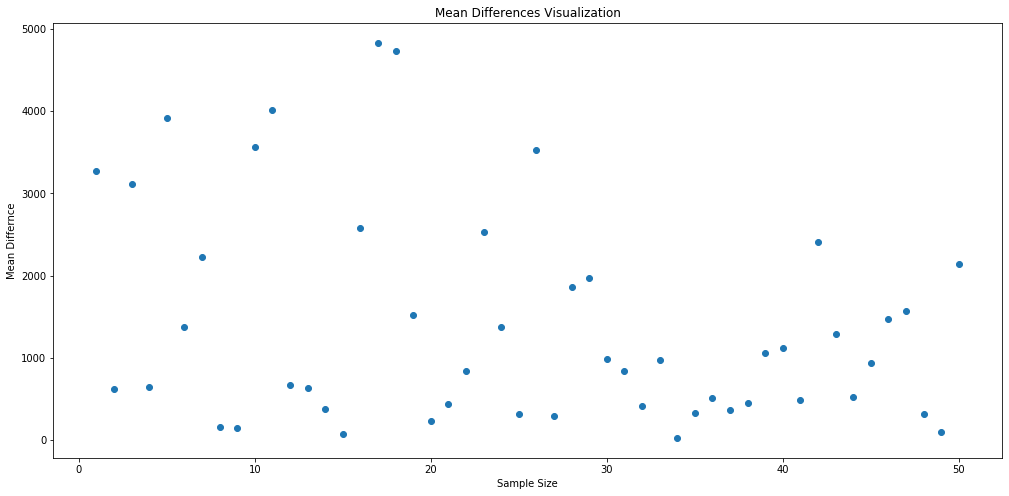

In [ ]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
# d = {'Sample Size':n, 'Mean Difference': means_diff}
# s_plot_df = pd.DataFrame(data=d)

# s_plot_df.plot()

fig, ax = plt.subplots(figsize=(17,8))

# Create scatter plot
ax.scatter(n, 
           means_diff)

ax.set(title = "Mean Differences Visualization",
       xlabel = "Sample Size", 
       ylabel = "Mean Differnce")

plt.show()

In [ ]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
n = []
for i in range(1,301): # sample size of 300
    n.append(i)

means_diff ={}

for j in range(1,21):
    temp = []
    means_diff["Attempt "+str(j)] = temp
    for k in n:
        k_df = df.sample(n=k)
        s_mean = k_df['TUITIONFEE_IN'].mean()
        temp.append(abs(s_mean-mean))

df_300 = pd.DataFrame(means_diff,index=n) # Assigning sample size list as the index for convenience


In [ ]:
df_300.head(10)

,Attempt 1,Attempt 2,Attempt 3,Attempt 4,Attempt 5,Attempt 6,Attempt 7,Attempt 8,Attempt 9,Attempt 10,Attempt 11,Attempt 12,Attempt 13,Attempt 14,Attempt 15,Attempt 16,Attempt 17,Attempt 18,Attempt 19,Attempt 20
1,11222.547421,10534.547421,527.547421,1987.452579,12158.547421,726.547421,9550.547421,6030.547421,5893.547421,5844.547421,41.547421,10676.547421,1296.547421,4744.452579,12104.547421,6148.547421,2703.452579,9176.547421,2895.547421,5348.452579
2,2300.452579,14360.452579,9706.952579,4821.547421,5695.547421,2894.547421,92.547421,1629.547421,1053.452579,4075.047421,2147.452579,506.547421,4521.047421,15085.452579,9902.047421,7128.452579,1073.452579,5209.547421,6447.452579,3349.952579
3,9672.880754,61.452579,681.119246,2604.547421,3181.214087,894.547421,4623.547421,640.785913,5945.214087,2247.880754,2252.785913,885.452579,3510.119246,6107.880754,2592.214087,9171.452579,1538.119246,4261.880754,3198.880754,3938.785913
4,2172.797421,12436.952579,7756.952579,8614.952579,3583.547421,6430.047421,2008.547421,2111.952579,7167.202579,3797.047421,1050.547421,5406.047421,1319.952579,1237.452579,1187.547421,721.547421,2638.952579,993.797421,4411.297421,978.547421
5,935.347421,2605.852579,2176.052579,4398.052579,579.252579,2762.347421,2174.852579,229.652579,2966.052579,4966.747421,5438.147421,2260.652579,1142.052579,6127.947421,3522.147421,9456.547421,2824.147421,2767.452579,379.947421,5611.747421
6,6615.380754,7601.619246,3620.380754,5802.119246,1273.880754,257.952579,3009.452579,5980.047421,4853.119246,4818.452579,1164.380754,7039.047421,910.285913,1230.380754,794.380754,6281.619246,2359.380754,1162.380754,7863.880754,10172.452579
7,2133.309722,92.595437,4091.547421,4977.881151,6161.452579,3194.404563,2198.690278,2439.309722,5420.690278,4101.975992,41.404563,7185.738294,2265.975992,475.452579,3082.547421,1534.452579,4022.547421,1356.738294,2330.309722,1586.404563
8,1113.547421,5679.422421,3420.672421,470.702579,6552.452579,1357.422421,1914.577579,28.077579,5175.547421,3785.422421,2468.827579,3775.547421,6028.797421,3424.047421,2447.422421,2340.452579,3021.422421,419.952579,1974.702579,2667.672421
9,4316.991865,5815.119246,780.436309,2992.769643,135.547421,877.785913,5404.452579,2165.785913,2160.436309,3594.230357,2179.658532,4177.325198,5291.452579,68.785913,554.547421,1235.563691,7943.214087,4816.897024,1385.008135,3084.119246
10,3270.352579,567.647421,2417.547421,1629.647421,2247.247421,1855.652579,831.647421,4027.847421,1366.247421,4282.152579,1699.847421,425.252579,1576.752579,2071.047421,30.952579,819.747421,2056.147421,5562.052579,195.652579,2248.947421


Text(0, 0.5, 'Mean Differnce')

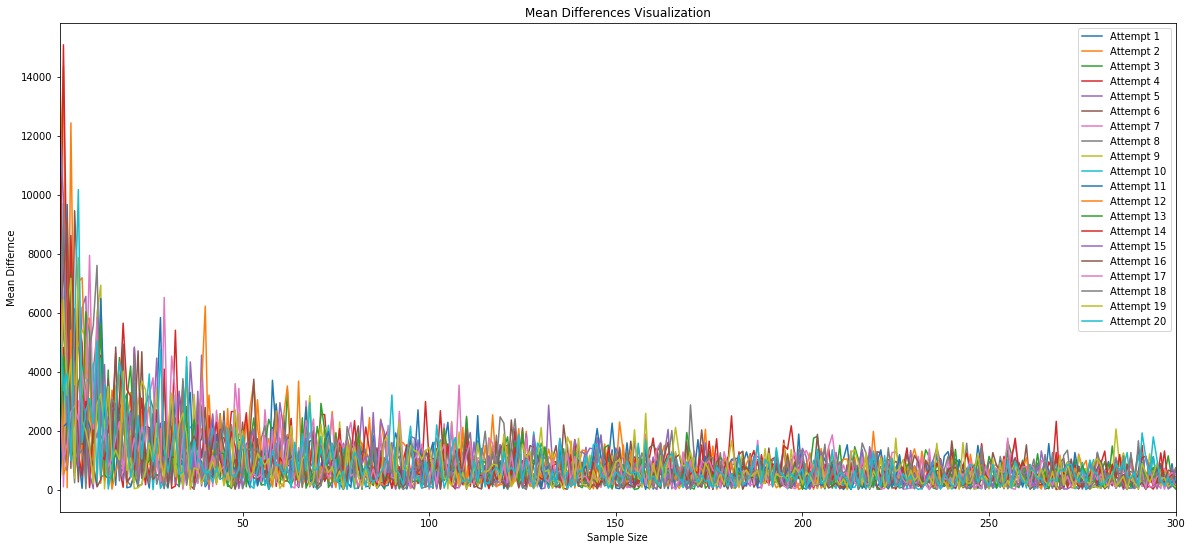

In [ ]:
df_300.plot(figsize=(20,9))
plt.title('Mean Differences Visualization')
plt.xlabel('Sample Size')
plt.ylabel('Mean Differnce')

In [ ]:
# The end - Give yourself a pat on the back!